Лабораторна робота №1. Використання бібліотек Pandas та Matplotlib

In [149]:
import pandas as pd

In [150]:
# 1. Відкрити та зчитати файл з даними. 
df = pd.read_csv('Weather.csv')
df.columns = df.columns.str.strip()

In [151]:
# 2. Визначити та вивести кількість записів та кількість полів у кожному записі. 
df.shape

(6812, 23)

In [152]:
# 3. Вивести 5 записів, починаючи з М-ого (число М – місяць народження
# студента, має бути визначено як змінна), та кожен N-ий запис, де число
# N визначається як 500 * М для місяця з першого півріччя та 300 * М для
# місяця з другого півріччя
m = 12
n = 300 * m

df.iloc[m::n].head(5)

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
12,1997-1-13,15.0,9.0,4.0,9.0,4.0,-1.0,100.0,75.0,38.0,...,10.0,9.0,3.0,11,2,NaN,0.0,4.0,Fog,128
3612,2007-3-29,14.0,9.0,5.0,3.0,2.0,-1.0,81.0,61.0,38.0,...,10.0,10.0,10.0,26,14,NaN,0.0,3.0,NaN,12


In [153]:
# 4. Визначити та вивести тип полів кожного запису. 
df.dtypes

CET                            object
Max TemperatureC              float64
Mean TemperatureC             float64
Min TemperatureC              float64
Dew PointC                    float64
MeanDew PointC                float64
Min DewpointC                 float64
Max Humidity                  float64
Mean Humidity                 float64
Min Humidity                  float64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm              float64
Mean VisibilityKm             float64
Min VisibilitykM              float64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                  int64
dtype: object

In [154]:
# 5. Замість поля СЕТ ввести нові текстові поля, що відповідають числу, 
# місяцю та року. Місяць та число повинні бути записані у
# двоцифровому форматі.
df['CET'] = df['CET'].apply(lambda x: "{:02d}-{:02d}-{}".format(*map(int, x.split("-")[::-1])))
df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,01-01-1997,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,02-01-1997,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,03-01-1997,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,04-01-1997,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,05-01-1997,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


In [155]:
# 6. Визначити та вивести: 
# a. Кількість днів із порожнім значенням поля Events
print("a) ", df["Events"].isna().sum())

# b. День, у який середня вологість була мінімальною, а також
# швидкості вітру в цей день
print("b) ", df[df["Mean Humidity"] == df["Mean Humidity"].min()][["CET", "Max Wind SpeedKm/h", "Mean Wind SpeedKm/h"]])

# c. Місяці, коли середня температура від нуля до п’яти градусів
df[['day', 'month', 'year']] = df['CET'].str.split('-', expand=True).astype(int)

filtered_df = df[(df['Mean TemperatureC'] >= 0) & (df['Mean TemperatureC'] <= 5)]
unique_cet_values = sorted(filtered_df["month"].unique().tolist())

print("c) ", unique_cet_values)


a)  5014
b)               CET  Max Wind SpeedKm/h  Mean Wind SpeedKm/h
3012  06-08-2005                  14                   10
c)  [1, 2, 3, 4, 11, 12]


In [156]:
# 7. Визначити та вивести: 
# a. Середню максимальну температуру по кожному дню за всі роки
print("a) ", df.groupby('day')['Max TemperatureC'].mean().head())
# b. Кількість днів у кожному році з туманом
print("b) ", df[df['Events'].str.contains('Fog', na=False)].groupby('year')['Events'].count().head())

a)  day
1    20.791111
2    20.878924
3    20.748879
4    20.924107
5    21.022321
Name: Max TemperatureC, dtype: float64
b)  year
1997    27
1998    17
1999    17
2000    15
2001    13
Name: Events, dtype: int64


In [157]:
import matplotlib.pyplot as plt

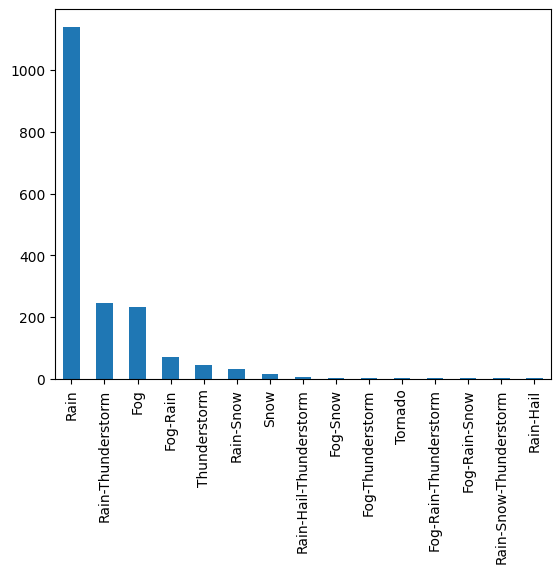

In [158]:
# 8. Побудувати стовпчикову діаграму кількості Events. 
event_counts = df['Events'].value_counts()
event_counts.plot(kind='bar')
plt.xlabel('')
plt.show()

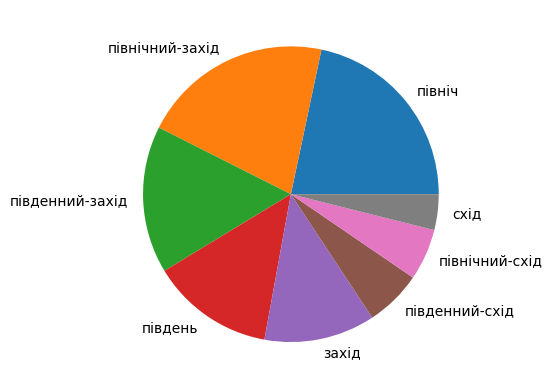

In [159]:
# 9. Побудувати кругову діаграму напрямків вітру (сектор на діаграмі має
# відповідати одному з восьми напрямків – північний, південний, східний, 
# західний та проміжні).

directions_dict = {
    (0, 45): 'північ',
    (45, 90): 'північний-схід',
    (90, 135): 'схід',
    (135, 180): 'південний-схід',
    (180, 225): 'південь',
    (225, 270): 'південний-захід',
    (270, 315): 'захід',
    (315, 360): 'північний-захід'
}

def get_wind_direction(degrees):
    for direction_range, direction_name in directions_dict.items():
        if direction_range[0] <= degrees < direction_range[1]:
            return direction_name

df["directions"] = df["WindDirDegrees"].apply(get_wind_direction)

direction_counts = df['directions'].value_counts()
direction_counts.plot(kind='pie')
plt.ylabel('')
plt.show()

In [160]:
directions_dict.items()

dict_items([((0, 45), 'північ'), ((45, 90), 'північний-схід'), ((90, 135), 'схід'), ((135, 180), 'південний-схід'), ((180, 225), 'південь'), ((225, 270), 'південний-захід'), ((270, 315), 'захід'), ((315, 360), 'північний-захід')])

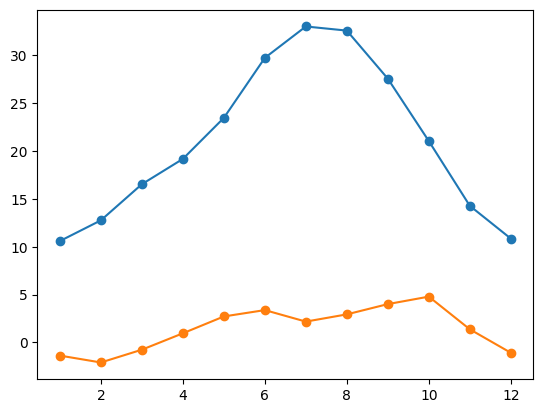

In [161]:
# 10. Побудувати на одному графіку (тип графіка обрати самостійно!): 
# a. Середню по кожному місяцю кожного року максимальну температуру; 
temperatures = df.groupby('month')['Max TemperatureC'].mean()
plt.plot(range(1,13), temperatures, marker="o")


# b. Середню по кожному місяцю кожного року мінімальну точку роси.
dewpoints = df.groupby('month')['Min DewpointC'].mean()
# plt.title('Середню по кожному місяцю кожного року мінімальну точку роси')
plt.plot(range(1,13), dewpoints, marker="o")
plt.show()

In [162]:
df.drop(columns=["directions", 'day', 'month', 'year'], inplace=True)
df.dtypes

CET                            object
Max TemperatureC              float64
Mean TemperatureC             float64
Min TemperatureC              float64
Dew PointC                    float64
MeanDew PointC                float64
Min DewpointC                 float64
Max Humidity                  float64
Mean Humidity                 float64
Min Humidity                  float64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm              float64
Mean VisibilityKm             float64
Min VisibilitykM              float64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                  int64
dtype: object